# **OLYMPICS DATA ANALYSIS**

## **Introduction**

The dataset is related to the information about Olympics of countries participating from 2000 to 2012. It contains information of winners, country name, sports in which they have participated, year along with date of medals given and number of gold, silver, bronze and total medals. 

| Variables	| Description | Statistical Data Type | Python Data Type (How Python is Reading)
|-|-|-|-|
name	| Name of the winner | Nominal | object (object)
age |	Age of winner at the time of winning medal | Continuous | float64 (float64)
country	| Country to which the winner belongs to | Nominal | object (object)
year	| Year of winning Olympic medal | Discrete | int64 (int64)
Date_Given	| Date of winning medal | Discrete | **datetime64** (object)
sports	| Sports in which medal is won | Nominal | object (object)
gold_medal	| Number of gold medals won | Discrete | int64 (int64)
silver_medal | Number of silver medals won | Discrete | int64 (int64)
bronze_medal	| Number of bronze medals won | Discrete | int64 (int64)
total_medal	| Total number of medals won by the winner | Discrete | int64 (int64)

## **Aim**

Aim of the dataset analysis is to find out which country has won maximum medals in particular Olympic Year

In [ ]:
# importing necessary libraries required to perform operations on dataset
import numpy as np                # importing numpy to perform mathematical operations
import pandas as pd               # importing pandas to perform data analysis    
import seaborn as sns             # importing for making statistical graphics
import matplotlib.pyplot as plt   # data visualization and graphical plotting
import warnings                   # importring warning to avoid future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
raw_data = pd.read_csv("/content/olympix_data_organized_with_header.csv") # reading dataset and asigning to variable "raw_data"
raw_data  # displaying the dataset

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,10-01-2000,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,10-01-2000,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,10-01-2000,Archery,0,0,1,1


* Dataset contains 8618 rows and 10 columns.
* It is observed from the dataset that, one of the medals column named "brone_medal" spelled wrongly. Let's rename the said column appropriately. And also "Date_Given" column to "date_given" to follow uniform case for all columns in the dataset.

### **Renaming the Columns:**

In [ ]:
# renaming columns
raw_data = raw_data.rename(columns = {"Date_Given" : "date_given", "brone_medal" : "bronze_medal"})

In [ ]:
# dataset information viz., observations / entries, features / columns and datatypes 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   date_given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   bronze_medal  8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


* Dataset consists of **8168 entries** and **10 columns**.
* Datatype of **date_given** column should be **datetime** type but python is reading it as **object** type.


* Let's change the datatype of **date_given** column to **datetime**.

### **Changing Datatype of date_given column:**

In [ ]:
raw_data["date_given"] = pd.to_datetime(raw_data["date_given"]) # changing datatype to datetime
raw_data.info() # displaying information to check datatypes  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          8613 non-null   object        
 1   age           8613 non-null   float64       
 2   country       8618 non-null   object        
 3   year          8618 non-null   int64         
 4   date_given    8618 non-null   datetime64[ns]
 5   sports        8618 non-null   object        
 6   gold_medal    8618 non-null   int64         
 7   silver_medal  8618 non-null   int64         
 8   bronze_medal  8618 non-null   int64         
 9   total_medal   8618 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 673.4+ KB


* Datatype of date_given column is being successfully changed to **datetime64**.

In [ ]:
raw_data

,name,age,country,year,date_given,sports,gold_medal,silver_medal,bronze_medal,total_medal
0,Michael Phelps,23.0,United States,2008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,2012-08-12,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,2000-10-01,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,2000-10-01,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,2000-10-01,Archery,0,0,1,1


### **Checking for Duplicates:**

In [ ]:
raw_data.duplicated().sum() # checking the number of duplicate records

3

In [ ]:
raw_data[raw_data.duplicated()] # checking the duplicate rows

,name,age,country,year,date_given,sports,gold_medal,silver_medal,bronze_medal,total_medal
1429,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
1430,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
4486,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1


In [ ]:
raw_data = raw_data.drop_duplicates()  # keeping first occurence and dropping the other duplicated records

In [ ]:
raw_data.duplicated().sum()             # checking whether the duplicates are dropped or not

0

In [ ]:
raw_data.shape                          # cross-checking with shape of the dataset

(8615, 10)

* There are 3 duplicate records found in the dataset.
* After removing 3 duplicate records from the dataset, it contains **8615 records**

### **Checking for Null Values:**

In [ ]:
raw_data.isnull().sum()                 # checking the number of missing values in the dataset

name            2
age             2
country         0
year            0
date_given      0
sports          0
gold_medal      0
silver_medal    0
bronze_medal    0
total_medal     0
dtype: int64

* It is observed that, a total of 4 missing values identified and 2 in each of the name and age columns.
* While missing values in age column can be filled using appropriate statistical measures, name of the winner column could not be filled with any other value. And also filling age column without filling name column could not make any proper sense if those missing values in age column belongs to the records of name column.    

In [ ]:
raw_data[raw_data["name"].isnull()]           # checking null values in name column

,name,age,country,year,date_given,sports,gold_medal,silver_medal,bronze_medal,total_medal
1428,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
4485,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1


In [ ]:
raw_data[raw_data["age"].isnull()]            # checking null values in age column

,name,age,country,year,date_given,sports,gold_medal,silver_medal,bronze_medal,total_medal
1428,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
4485,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1


In [ ]:
raw_data[raw_data.isnull().any(axis=1)]       # checking null values in entire dataframe

,name,age,country,year,date_given,sports,gold_medal,silver_medal,bronze_medal,total_medal
1428,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
4485,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1


* Since 2 missing values of age column in dataset belongs to name column records where missing values identified in name column (i.e., index of missing values row in age column is equal to index of missing value row in name column), it is decided to drop those records which has missing values.

In [ ]:
raw_data = raw_data.dropna()                  # dropping the missing rows from dataset

In [ ]:
raw_data.isnull().sum()                       # checking whether na values are dropped or not

name            0
age             0
country         0
year            0
date_given      0
sports          0
gold_medal      0
silver_medal    0
bronze_medal    0
total_medal     0
dtype: int64

In [ ]:
raw_data.shape                                # checking the shape of the dataset after dropping na values

(8613, 10)

* After dropping the records which are having missing values, dataset contains 8613 records and 10 columns

In [ ]:
raw_data

,name,age,country,year,date_given,sports,gold_medal,silver_medal,bronze_medal,total_medal
0,Michael Phelps,23.0,United States,2008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,2012-08-12,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,2000-10-01,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,2000-10-01,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,2000-10-01,Archery,0,0,1,1


### **Dealing with special characters from the name column.**

In [ ]:
def updated_name(x):                            # defining function updated_name
  s = []                                        # empty list
  st = ""                                       # empty string
  for i in x:                                   # iterating through name string
    # checking for other than special characters 
    if i.isalpha()==True or i.isdigit()==True or i.isspace():
      s.append(i)                               # appending to empty list
  st = st.join(s)                               # joining the elements in the list
  return st                                     # returning the updated name
raw_data["name"].apply(updated_name)            # calling each name and applying function

0            Michael Phelps
1            Michael Phelps
2            Michael Phelps
3          Natalie Coughlin
4             Aleksey Nemov
               ...         
8613       Olena Sadovnycha
8614       Kateryna Serdiuk
8615       Wietse van Alten
8616    Sandra WagnerSachse
8617              Rod White
Name: name, Length: 8613, dtype: object

In [ ]:
olympics_data = raw_data.copy()           # copying the dataframe to another appropriate variable name "olympics_data"

In [ ]:
olympics_data.describe()                       # checking statistical summary of numerical columns 

,age,year,gold_medal,silver_medal,bronze_medal,total_medal
count,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000,8613.000000
mean,26.405434,2005.975386,0.364914,0.362940,0.377917,1.105770
std,5.102118,4.288737,0.545436,0.511531,0.505069,0.409003
min,15.000000,2000.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,2002.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,2006.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,2010.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,2012.000000,8.000000,3.000000,3.000000,8.000000


### **Skewness of Columns:**

In [ ]:
round(olympics_data.skew(),3) # checking the skewness of the numerical columns and rounding off the value to 3 decimal places

age             0.859
year           -0.001
gold_medal      1.639
silver_medal    0.955
bronze_medal    0.762
total_medal     5.581
dtype: float64

* Skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

|Skewness Value|Skewness Type|
|-|-|
|>1|Highly Right Skewed|
|<1|Higly Left Skewed|
|0.5 to 1|Moderately Right Skewed|
|-0.5 to -1|Modearately Left Skewed|
|-0.5 to 0.5|Fairly Symmetrical|

|Variable|Skewness Value of Variable|Skewness Type of Variable|
|--------|--------------|-------------|
age|0.859|Moderately right skewed
year|-0.001|Normally distributed|
gold_medal|1.638|Highly right skewed
silver_medal|0.955|Moderately right skewed
bronze_medal|0.762|Moderately right skewed
total_medal|5.580|Highly right skewed


Based on the Skewness values and the type of distributions of variables, the following measures can be applied on numerical columns
* **Measures of Central Tendency:**
  - Normally Distributed Variables - **Mean** - Sensitive to Outliers
  - Skewed Variables -  **Median** - Robust to Outliers
* **Measures of Dispersion:**
  - **Inter Quartile Range** - Not influenced by Outliers

Categorial Columns - **Mode**

In [ ]:
round(olympics_data["year"].mean())   # mean of year column

2006

* 2006 is the Mean Year

In [ ]:
# creating dataframe with skewed columns
skewed_columns_df = olympics_data[["age", "gold_medal", "silver_medal", "bronze_medal", "total_medal"]] 

In [ ]:
# defining iqr function to find out interquartile range for skewed columns
def iqr(i):
  return np.subtract(*np.percentile(i, [75,25]))

skewed_columns_df.apply(iqr)

age             6.0
gold_medal      1.0
silver_medal    1.0
bronze_medal    1.0
total_medal     0.0
dtype: float64

In [ ]:
categorical_columns = olympics_data[["name", "country", "sports"]]
categorical_columns

,name,country,sports
0,Michael Phelps,United States,Swimming
1,Michael Phelps,United States,Swimming
2,Michael Phelps,United States,Swimming
3,Natalie Coughlin,United States,Swimming
4,Aleksey Nemov,Russia,Gymnastics
...,...,...,...
8613,Olena Sadovnycha,Ukraine,Archery
8614,Kateryna Serdiuk,Ukraine,Archery
8615,Wietse van Alten,Netherlands,Archery
8616,Sandra Wagner Sachse,Germany,Archery


In [ ]:
olympics_data["name"].mode()    # mode of name column

0           Anky van Grunsven
1              Artur Taymazov
2                 Ben Ainslie
3             Bradley Wiggins
4                Brenda Villa
5                   Chris Hoy
6     Christie Pearce Rampone
7              Emilie Heymans
8              Eskild Ebbesen
9               Heather Petri
10                Jason Lezak
11             Katalin Kov cs
12         Katherine Grainger
13     Katrin Wagner Augustin
14                  Kim Rhode
15            Kristi Harrower
16             Lauren Jackson
17               Leisel Jones
18                Lucha Aymar
19                 Matt Wells
20            Michal Martik n
21         Pavol Hochschorner
22         Peter Hochschorner
23             Robert Scheidt
24           Sergey Tetyukhin
25          Valentina Vezzali
26    Veronica Campbell Brown
27                   Wang Hao
28                   Yang Wei
dtype: object

* It is observed that, 29 names had occured most of the time in the dataset which means they have won in most occasions during Olympics 2000 to 2012. 

In [ ]:
olympics_data["country"].mode()     # mode of country column

0    United States
dtype: object

* United States is the country which had occured most of the times in country column which means it has won in most occasions during Olympics 2000 to 2012.

In [ ]:
olympics_data["sports"].mode()      # mode of sports column

0    Athletics
dtype: object

* Athletics is the sport which had occured most of the times in sport column.

### **Data Visualization of Distribution of Numerical Columns:**

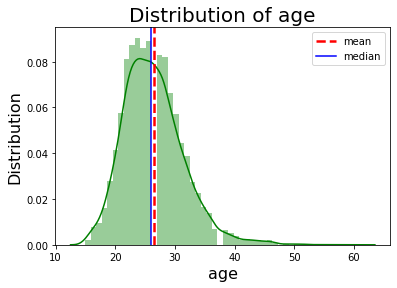

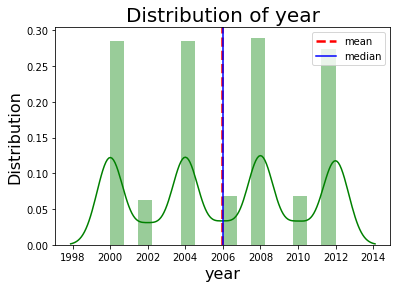

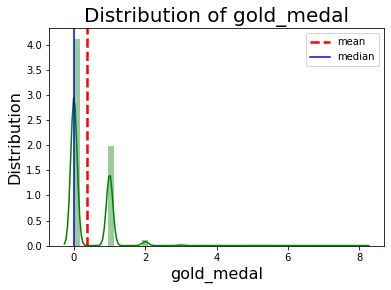

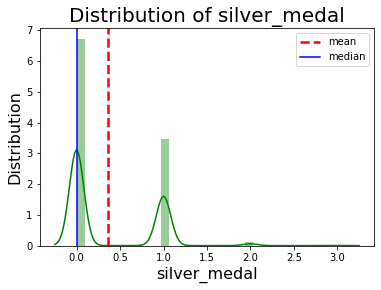

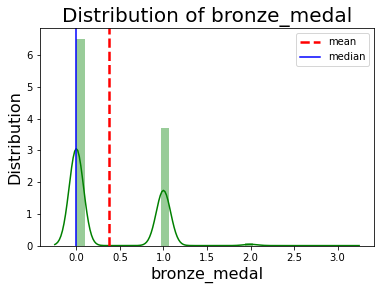

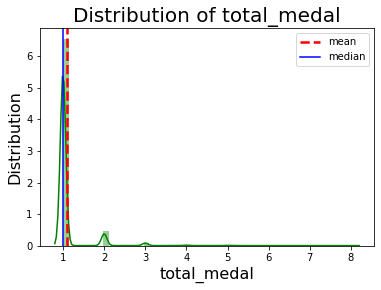

In [ ]:
numerical_columns = ["age","year","gold_medal","silver_medal","bronze_medal","total_medal"] # creating a list of numerical columns 
for i in numerical_columns:                                                         # for loop iterating numerical_columns list to plot distribution plots.
    fig,ax = plt.subplots(1,1)                                                      # assigning veiw of the graphs on the notebook.
    sns.distplot(olympics_data[i], kde=True,  color="g")                            # plotting the distribution plot.
    plt.title('Distribution of %s'%(i),fontsize=20)                                 # giving title to each graph.
    plt.axvline(x=olympics_data[i].mean(),ls='--',lw=2.5,color='red',label="mean")  # fixing 'mean' line and its characteristics.
    plt.axvline(x=olympics_data[i].median(),color='blue',label="median")            # fixing 'median' line and its characteristics.
    plt.legend()                                                                    # showing legends in each graph.
    plt.xlabel(i,fontsize=16)                                                       # fixing x-axis name.
    plt.ylabel('Distribution',fontsize=16)                                          # fixing y-axis name.

### **Data Visualization of Categorical Columns:**

In [ ]:
olympics_data[["name", "sports", "country"]].nunique()    # number of unique values in each categorical columns

name       6955
sports       49
country     110
dtype: int64

* The number of unique values in catergorical columns **name**, **sports** and **country** are **6955**, **49** and **110** respectively.
* Since unique values in name column are more than 6000 which is huge, it is not feasible to visualize the name column. However, visualization of name column integrating with country can performed to check number of individual winners from each country.
* Number of unique values in sports and country column are 49 and 110 respectively.  

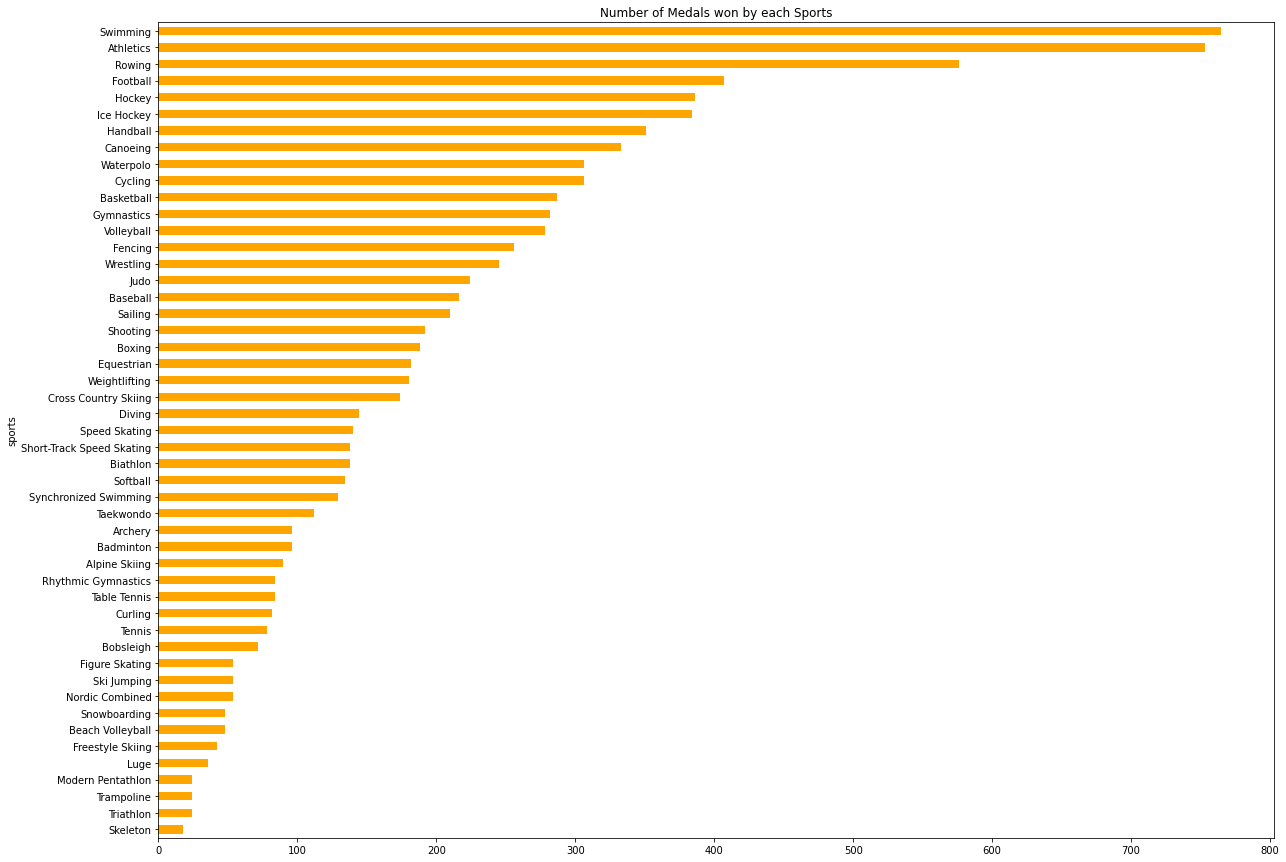

In [ ]:
# total medals won in each sports using groupby and creating dataframe
sports_medals_count = olympics_data.groupby(["sports"])["total_medal"].sum().sort_values(ascending = True)
plt.figure(figsize=(20,15))                                     # setting figure size
plt.title("Number of Medals won by each Sports")                # setting title
sports_medals_count.plot(kind="barh", color="orange")           # plotting bar graph horizontally

* Top 05 Sports categories in which most medals won are **Swimming, Athletics, Rowing, Football and Hockey** in Olympics during 2000 to 2012.

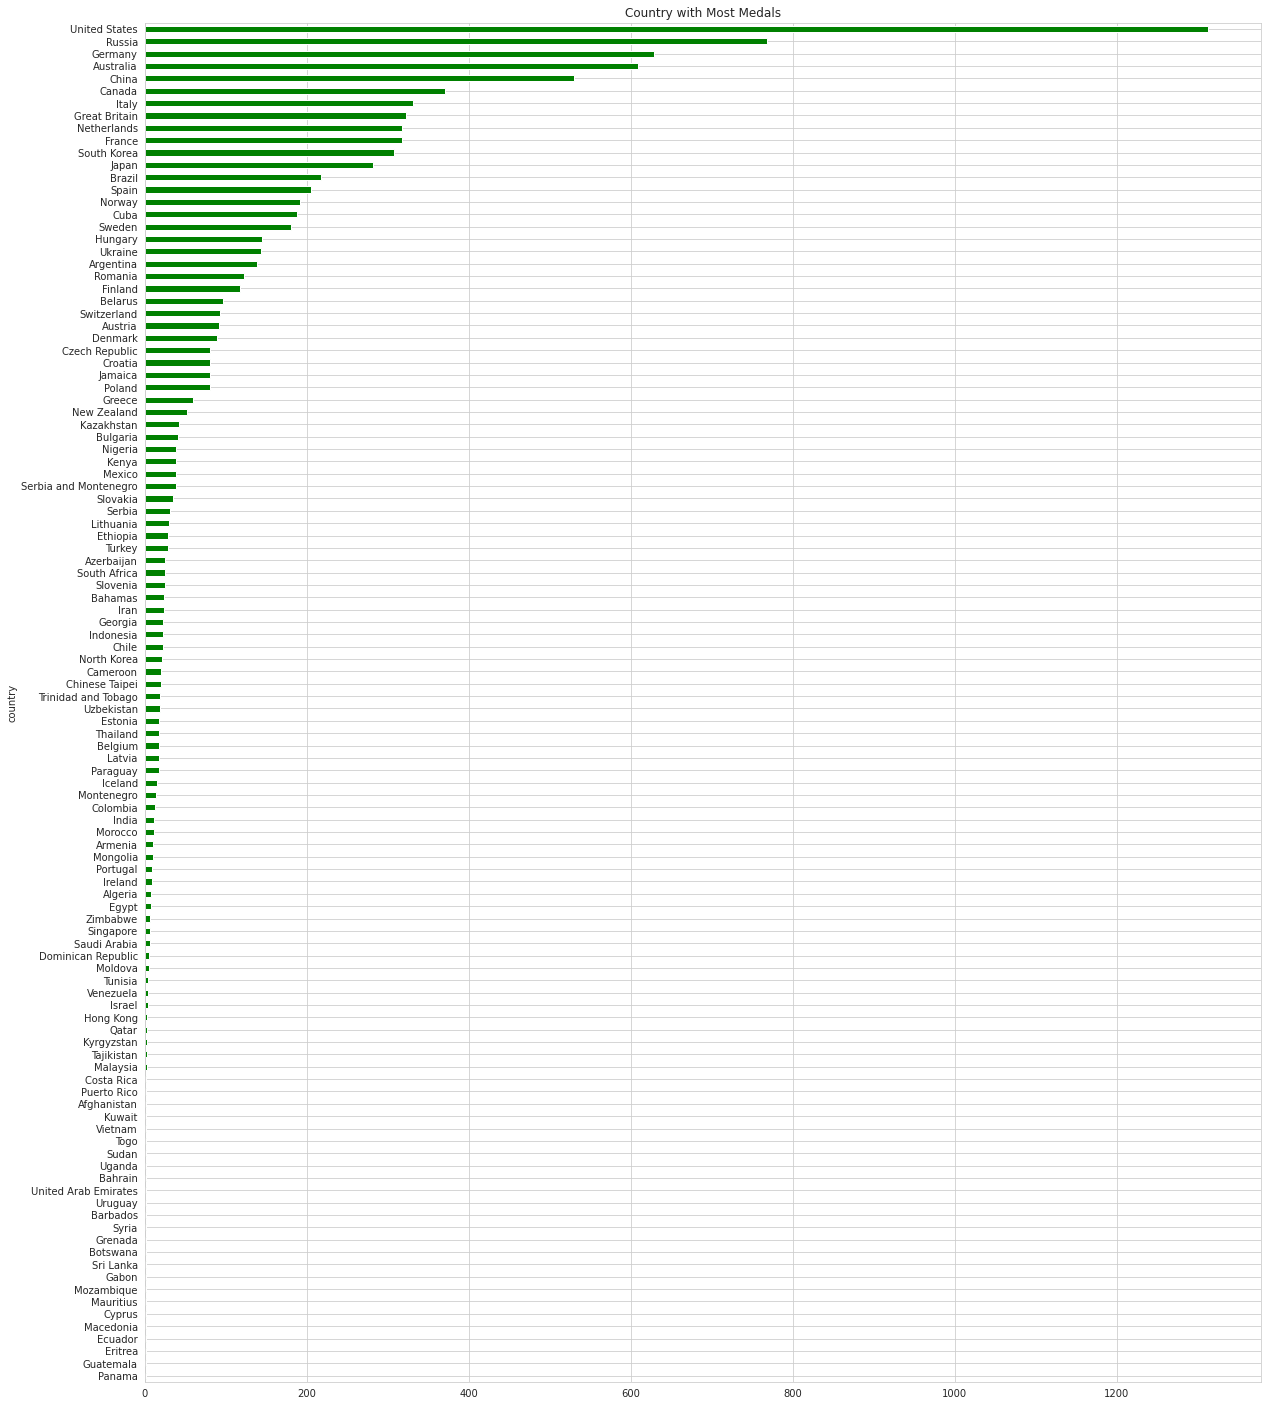

In [ ]:
# total medals won by each country using groupby and creating a dataframe
country_medals_count = olympics_data.groupby(["country"])["total_medal"].sum().sort_values(ascending = True)
plt.figure(figsize=(20,25))                                       # setting figure size
plt.title("Number of Medals won by each Country ")                # setting title
country_medals_count.plot(kind="barh", color="green")             # plotting bar graph horizontally

* Top 05 Countries which won most medals are **United States, Russia, Germany, Australia and China** in Olympics during 2000 to 2012.

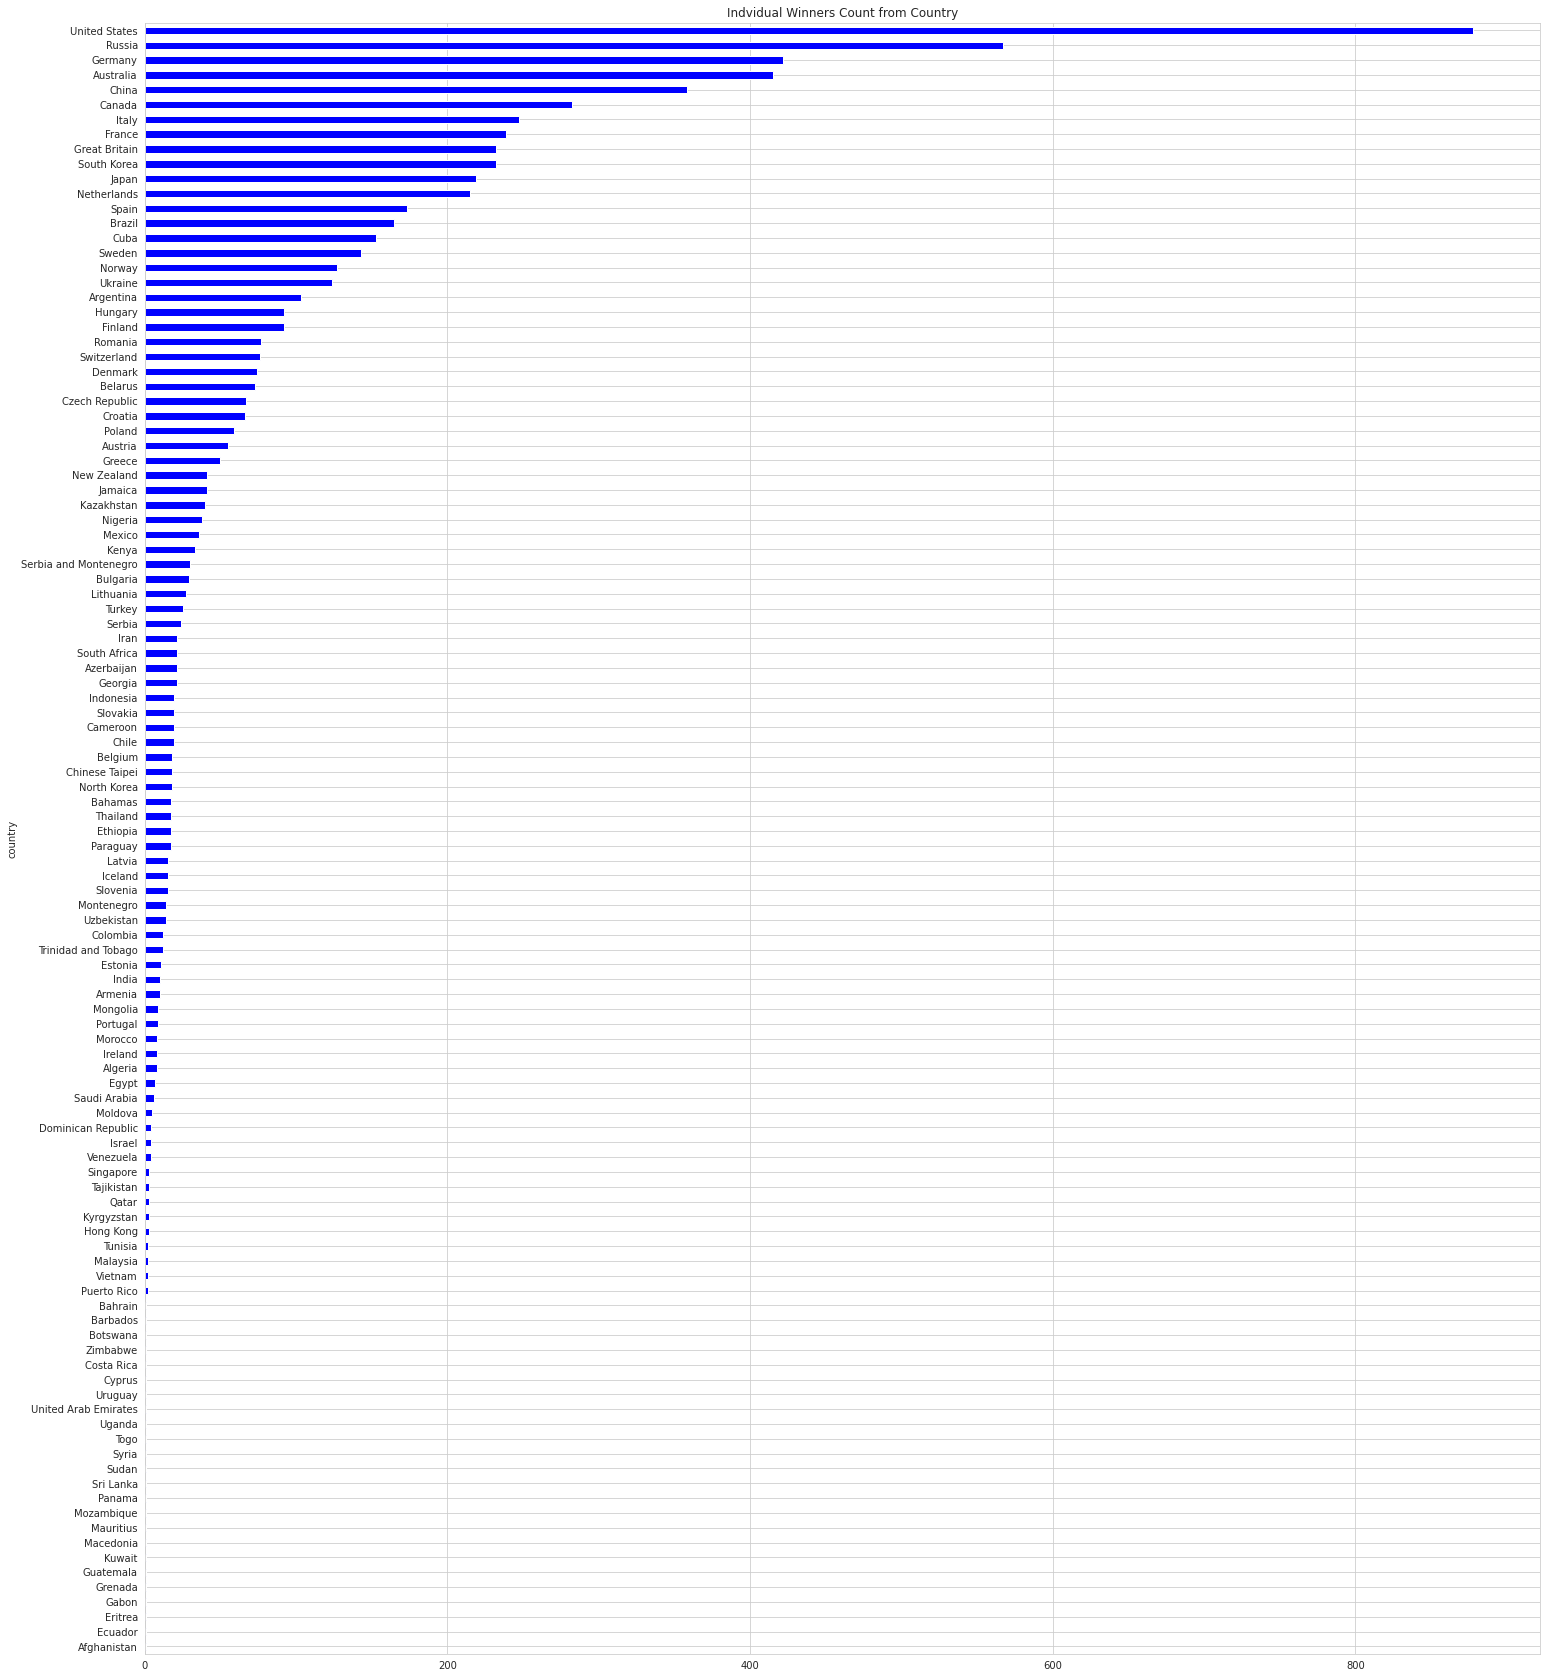

In [ ]:
# unique winners count from each country using groupby 
winners_count_country = olympics_data.groupby(["country"])["name"].nunique().sort_values(ascending = True)
plt.figure(figsize=(25,30))                                     # setting figure size
plt.title("Unique Winners Count from Country")                  # setting title to plot 
winners_count_country.plot(kind="barh", color="blue")           # plotting bar graph horizontally

### **Skewness of Age Column:**

In [ ]:
print(f"Skewness of Age : {round(olympics_data['age'].skew(),2)}")                    # skewness of age column

Skewness of Age : 0.86


* Skewness value of Age is 0.86 which is between 0.5 and 1 indicates that, the Age column is moderately right skewed.

### **Visualization of Age Column:**

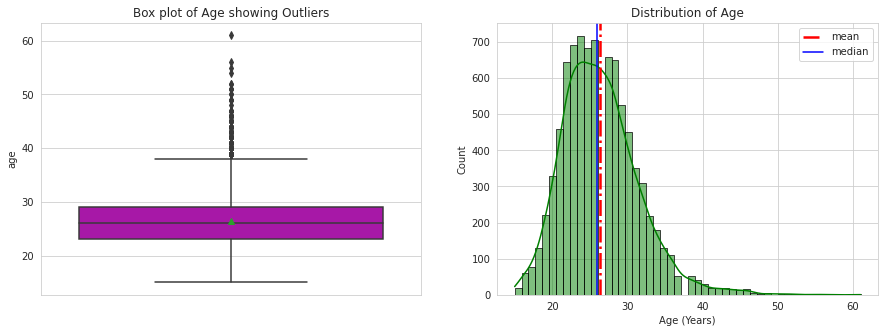

In [ ]:
# creating subplots
fig, ax = plt.subplots(1,2, figsize=(15,5), squeeze = False)                          # setting figure size

sns.set_style("whitegrid")                                                            # setting plot background.
sns.boxplot(y='age', data=olympics_data, color = "m", ax=ax[0][0], showmeans=True).set_title('Box plot of Age showing Outliers')    # plotting boxplot and showing mean

# creating histogram plot
sns.histplot(olympics_data["age"], kde=True, color = 'g', edgecolor='black', bins=50, ax=ax[0][1]).set(title = 'Distribution of Age', xlabel = 'Age (Years)')
plt.axvline(x=olympics_data["age"].mean(),ls='-.',lw=2.5,color='red',label="mean")    # setting 'mean' line of age 
plt.axvline(x=olympics_data["age"].median(),color='blue',label="median")              # fixing 'median' line of age
plt.legend()                                                                          # displaying legend

In [ ]:
round(olympics_data["age"].mean(),2)                              # mean of age column

26.41

In [ ]:
round(olympics_data["age"].median(),2)                            # median of age column

26.0

* Box plot of age shows both **mean (26.41)** and **median (26.0)** are very close to each other which is also evident from the age distribution plot.
* Age column also contains outliers which can be seen from the Age Boxplot and also distribution of data shows that it is **moderately right skewed distribution** which is also evident from skewness value of **0.86** of age column.


### **Transformation of Age Column:**

In [ ]:
olympics_data["log_age"] = np.log(olympics_data["age"])                               # creating new column log_age by applying log transformation

In [ ]:
print(f"Skewness of log_age : {round(olympics_data['log_age'].skew(),2)}")            # checking skewness of newly created column

Skewness of log_age : 0.15


* Logarithmic Age skewness value of **0.15** which is between **-0.5 and 0.5** indicates that the  distribution Logarithmic Age will be **normal distribution**.

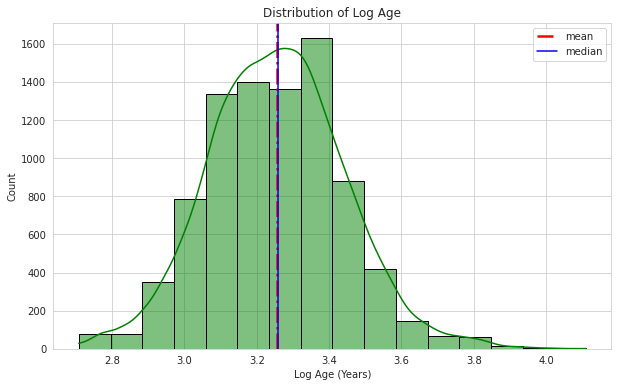

In [ ]:
# setting figure size
plt.figure(figsize = (10,6))
# creating histogram plot
sns.histplot(olympics_data["log_age"], kde=True, color = 'g', edgecolor='black', bins=16).set(title = 'Distribution of Log Age', xlabel = 'Log Age (Years)')
plt.axvline(x=olympics_data["log_age"].mean(),ls='-.',lw=2.5,color='red',label="mean")    # setting 'mean' line of age 
plt.axvline(x=olympics_data["log_age"].median(),color='blue',label="median")              # fixing 'median' line of age
plt.legend()                                                                              # including legend

In [ ]:
print(f"Mean of log_age : {round(olympics_data['log_age'].mean(),2)}")              # mean of log_age column

Mean of log_age : 3.26


In [ ]:
print(f"Mean of log_age : {round(olympics_data['log_age'].median(),2)}")            # median of log_age column

Mean of log_age : 3.26


* Distribution of Age column which was **Moderately right skewed** turns out to be **Normal Distribution** after applying Logarithmic transformation which is also evident from skewness value of **log_age** is **0.15** which is between -0.5 and 0.5.
* It is also observed that, both the **mean (3.26)** and **median (3.26)** values of age column after applying logarithmic transformation are equal 

### **Top 10 Countries with Gold Medals:**

country
United States    552
Russia           234
China            234
Germany          223
Canada           168
Australia        163
Great Britain    124
South Korea      110
France           108
Netherlands      101
Name: gold_medal, dtype: int64


Text(0.5, 1.0, 'Top 10 Countries with the Gold Medals')

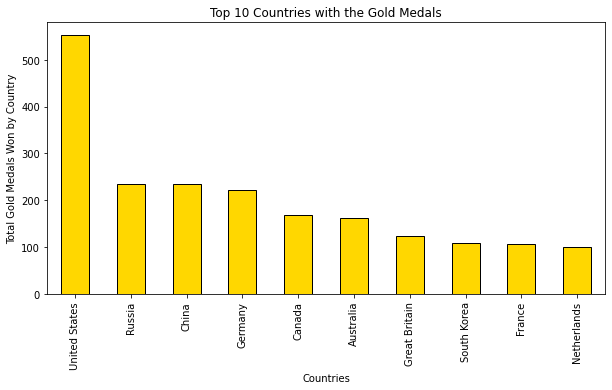

In [ ]:
# top 10 countries with Gold Medals using groupby on country and summation of gold medals and sorting values in descending order taking first 10 records 
top_ten_gold_countries = olympics_data.groupby(["country"])["gold_medal"].sum().sort_values(ascending = False).head(10)
print(top_ten_gold_countries)                                                                   # printing result
top_ten_gold_countries.plot(kind="bar", figsize=(10,5), color="gold", edgecolor="black")        # plotting bar graph
plt.xlabel("Countries")                                   # setting X-axis name
plt.ylabel("Total Gold Medals Won by Country")            # setting Y-axis name
plt.title("Top 10 Countries with the Gold Medals")        # giving title to the plot

* Top 10 Countries with Gold Medals: 
  * United States - 552 Gold Medals 
  * Russia - 234 Gold Medals
  * China - 234 Gold Medals
  * Germany - 223 Gold Medals
  * Canada - 168 Gold Medals
  * Australia - 163 Gold Medals
  * Great Britain - 124 Gold Medals
  * South Korea - 110 Gold Medals
  * France - 108 Gold Medals
  * Netherlands - 101 Gold Medals

* From the above plot it can be seen that, While **United States** has topped (1st) the list of countries won **Gold medals** with a count of **552 Gold Medals**; **Russia** and **China** sharing the 2nd rank with tally of **234 Gold Medals** each followed by **Germany with 223 Gold Medals** in Olympics during 2000 to 2012. Other countries in the top ten countries with gold medals are Canada, Australia, Great Britain, South Korea, France and Netherlands.

### **Top 10 Countries with Silver Medals:**

country
United States    440
Australia        226
Russia           221
Germany          183
China            156
Netherlands      135
Spain            116
Japan            112
France           107
Italy            103
Name: silver_medal, dtype: int64


Text(0.5, 1.0, 'Top 10 Countries with the Silver Medals')

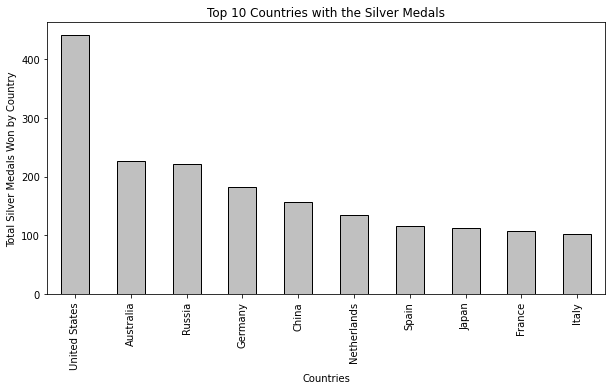

In [ ]:
# top 10 countries with Silver Medals using groupby on country and summation of silver medals and sorting values in descending order taking first 10 records
top_ten_silver_countries = olympics_data.groupby(["country"])["silver_medal"].sum().sort_values(ascending = False).head(10)
print(top_ten_silver_countries)                                                                   # printing result
top_ten_silver_countries.plot(kind="bar", figsize=(10,5), color="silver", edgecolor="black")      # plotting bar graph
plt.xlabel("Countries")                                     # setting X-axis name
plt.ylabel("Total Silver Medals Won by Country")            # setting Y-axis name
plt.title("Top 10 Countries with the Silver Medals")        # giving title to the plot

* Top 10 Countries with Silver Medals: 
  * United States - 440 Silver Medals 
  * Australia - 226 Silver Medals
  * RUssia - 221 Silver Medals
  * Germany - 183 Silver Medals
  * China - 156 Silver Medals
  * Netherlands - 135 Silver Medals
  * Spain - 116 Silver Medals
  * Japan - 112 Silver Medals
  * France - 107 Silver Medals
  * Italy - 103 Silver Medals

* From the above plot it can be seen that, **United States** has topped (1st) the list of countries won **Silver medals** with a count of **440 Silver Medals**; **Austraila** stands at 2nd position with **226 Silver Medals** followed by **Russia** at 3rd position with tally of **221 Silver Medals** in Olympics during 2000 to 2012. Other countries in the top ten countries with silver medals are Germany, China, Netherlands, Spain, Japan, France and Italy.

### **Top 10 Countries with Bronze Medals:**

country
United States    320
Russia           313
Germany          223
Australia        220
Italy            142
China            140
Japan            113
South Korea      105
Canada           104
France           103
Name: bronze_medal, dtype: int64


Text(0.5, 1.0, 'Top 10 Countries with the Bronze Medals')

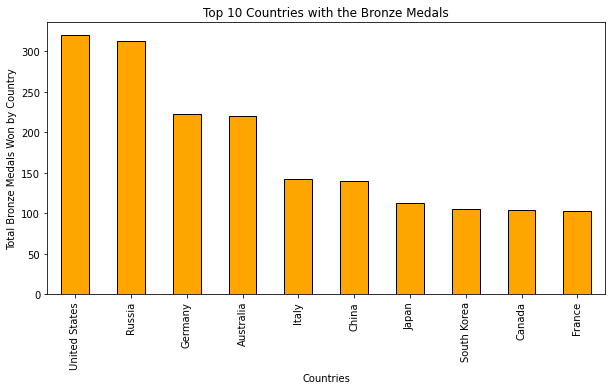

In [ ]:
# top 10 countries with Bronze Medals using groupby on country and summation of bronze medals and sorting values in descending order taking first 10 records
top_ten_bronze_countries = olympics_data.groupby(["country"])["bronze_medal"].sum().sort_values(ascending = False).head(10)
print(top_ten_bronze_countries)                                                                 # printing result
top_ten_bronze_countries.plot(kind="bar", figsize=(10,5), color="orange", edgecolor="black")    # plotting the bar graph
plt.xlabel("Countries")                                   # setting X-axis name
plt.ylabel("Total Bronze Medals Won by Country")            # setting Y-axis name
plt.title("Top 10 Countries with the Bronze Medals")        # giving title to the plot

* Top 10 Countries with Bronze Medals:
    * United States    - 320 Bronze Medals
    * Russia           - 313 Bronze Medals
    * Germany          - 223 Bronze Medals
    * Australia        - 220 Bronze Medals
    * Italy            - 142 Bronze Medals
    * China            - 140 Bronze Medals
    * Japan            - 113 Bronze Medals
    * South Korea      - 105 Bronze Medals
    * Canada           - 104 Bronze Medals
    * France           - 103 Bronze Medals

* From the above plot it is observed that, Once again **United States** has topped (1st) the list of countries won **Bronze medals** with a count of **320 Bronze Medals**; **Russia** stands at 2nd position with **313 Bronze Medals** followed by **Germany** at 3rd position with tally of **223 Bronze Medals** in Olympics during 2000 to 2012. Other countries in the top ten countries with bronze medals are Australia, Italy, China, Japan, South Korea, Canada and France.

### **Top 10 Countries with Total Medals:**

country
United States    1312
Russia            768
Germany           629
Australia         609
China             530
Canada            370
Italy             331
Great Britain     322
France            318
Netherlands       318
Name: total_medal, dtype: int64


Text(0.5, 1.0, 'Top 10 Countries with the Total Medals')

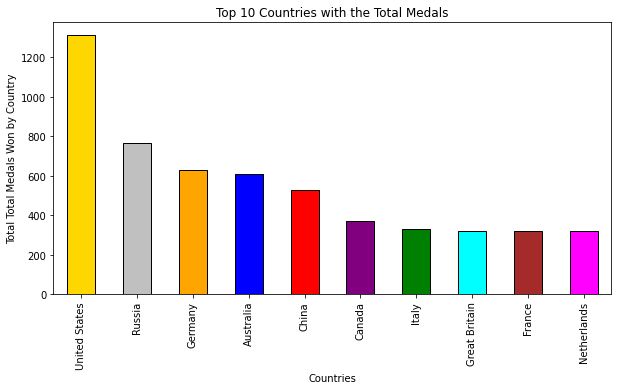

In [ ]:
# top 10 countries with Total Medals using groupby on country and summation of total medals and sorting values in descending order taking first 10 records
top_ten_total_countries = olympics_data.groupby(["country"])["total_medal"].sum().sort_values(ascending = False).head(10)
c = ['gold', 'silver', 'orange', 'blue', 'red', 'purple', 'green', 'cyan', 'brown', 'magenta']  # creating a list for colors
print(top_ten_total_countries)                                                                  # printing the result
top_ten_total_countries.plot(kind="bar", figsize=(10,5), color=c, edgecolor="black")            # plotting bar graph
plt.xlabel("Countries")                                    # setting X-axis name
plt.ylabel("Total Medals Won by Country")            # setting Y-axis name
plt.title("Top 10 Countries with the Total Medals")        # giving title to the plot

* Top 10 Countries with Total Medals:
   * United States    - 1312 Medals
   * Russia           - 768 Medals
   * Germany          - 629 Medals
   * Australia        - 609 Medals
   * China            - 530 Medals
   * Canada           - 370 Medals
   * Italy            - 331 Medals
   * Great Britain    - 322 Medals
   * France           - 318 Medals
   * Netherlands      - 318 Medals

* From the above plot it is observed that, **United States** has topped (1st) the list of countries with total medals with a total tally of **1312 Medals** which includes gold, silver and bronze medals followed by **Russia (768 Medals)** and **Germany (629 Medals)** in Olympics during 2000 to 2012.

## **CONCLUSIONS:**
* **United States** has secured **first place** in all three types of medals list with Highest number of **Gold (552), Silver (440), Bronze (320) Medals**. Subsequently it has secured top place in Total Medals tally with **1312 Medals** in Olympics during 2000 to 2012.

* **Russia and China** shared the **2nd rank** in Top 10 Countries with Gold Medals with tally of **234 Gold Medals** each followed by **Germany** with **223 Gold Medals** in Olympics during 2000 to 2012.

* **Austraila** stands at **2nd position** in Top 10 Countries with Silver Medals with **226 Silver Medals** followed by **Russia** at **3rd position** with tally of **221 Silver Medals** in Olympics during 2000 to 2012.

* **Russia** stands at **2nd position** in Top 10 Countries with **Bronze Medals** with **313 Bronze Medals** followed by **Germany** at **3rd position** with tally of **223 Bronze Medals** in Olympics during 2000 to 2012.

* **Russia (768 Medals) and Germany (629 Medals)** secured **2nd and 3rd positions** respectively in Top 10 Countries with Total Medals in Olympics during 2000 to 2012.

* Top 05 Sports categories in which most medals won are **Swimming, Athletics, Rowing, Football and Hockey** in Olympics during 2000 to 2012.

* Top 05 Countries which won most medals are **United States, Russia, Germany, Australia and China** in Olympics during 2000 to 2012.

In [ ]:
olympics_data.to_csv("olympics_dataset.csv")               # saving the olympics data to olympic_dataset.csv including index

In [ ]:
olympics_data.to_csv("olympix_data.csv", index=False)     # saving the olympics data to olympic_dataset.csv excluding index